# SUP ML 2 - MODEL

### ALUMNAS: Laura López, Marina Ramiro, Sofía Schweiger

# Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.figure_factory as ff # visualization
import seaborn as sns

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")

# Carga clean data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Load pickle:
df = pd.read_pickle('/content/drive/MyDrive/NDS_2023/EJERCICIO-ML-Sup/model/230601_churn_clean.csv')

In [4]:
df.shape

(90000, 137)

# Split X-y

In [5]:
target = 'churn'
# En clasificación, el target es booleano (True/False)
df[target] = df[target].astype('bool')

In [6]:
features = df.columns[df.columns != target]

In [7]:
y = df[target]
X = df[features]

In [8]:
print('Target del modelo:', target)
print('Variables a utilizar en el modelo:', list(features))

Target del modelo: churn
Variables a utilizar en el modelo: ['rev', 'mou', 'totmrc', 'da', 'ovrmou', 'ovrrev', 'vceovr', 'datovr', 'roam', 'change_mou', 'change_rev', 'drop_vce', 'drop_dat', 'blck_vce', 'blck_dat', 'unan_vce', 'unan_dat', 'plcd_vce', 'plcd_dat', 'recv_vce', 'recv_sms', 'comp_vce', 'comp_dat', 'custcare', 'ccrndmou', 'cc_mou', 'inonemin', 'threeway', 'mou_cvce', 'mou_cdat', 'mou_rvce', 'owylis_vce', 'mouowylisv', 'iwylis_vce', 'mouiwylisv', 'peak_vce', 'peak_dat', 'mou_peav', 'mou_pead', 'opk_vce', 'opk_dat', 'mou_opkv', 'mou_opkd', 'drop_blk', 'attempt', 'complete', 'callfwdv', 'callwait', 'months', 'uniqsubs', 'actvsubs', 'asl_flag', 'totcalls', 'totmou', 'totrev', 'adjrev', 'adjmou', 'adjqty', 'avgrev', 'avgmou', 'avgqty', 'avg3mou', 'avg3qty', 'avg3rev', 'avg6mou', 'avg6qty', 'avg6rev', 'refurb_new', 'hnd_price', 'phones', 'models', 'truck', 'rv', 'ownrent', 'lor', 'dwlltype', 'adults', 'income', 'numbcars', 'dwllsize', 'forgntvl', 'kid0_2', 'kid3_5', 'kid6_10', 'ki

# Distribución del target

[]

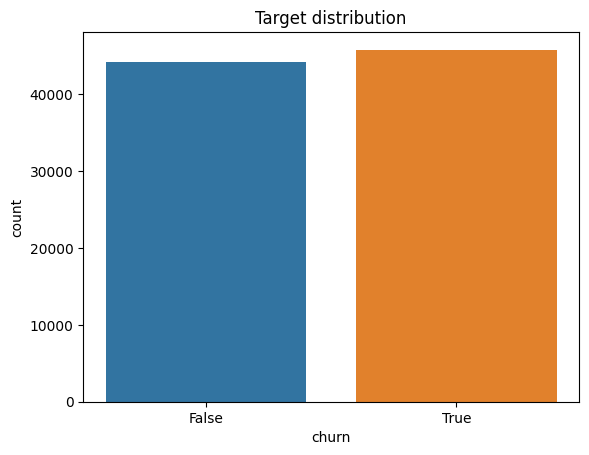

In [9]:
sns.countplot(x=df[target])
plt.title('Target distribution')
plt.plot()

# Undersampling (*)

**NOTA:** SOLO EN CLASIFICACIÓN cuando el ratio de éxitos está MUY DESBALANCEADO (<10%).

# Split TRAIN-TEST

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# Divide X-y en Train (70%) y Test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [12]:
print('Train data instances:', len(y_train))
print('Test data instances:', len(y_test))

Train data instances: 63000
Test data instances: 27000


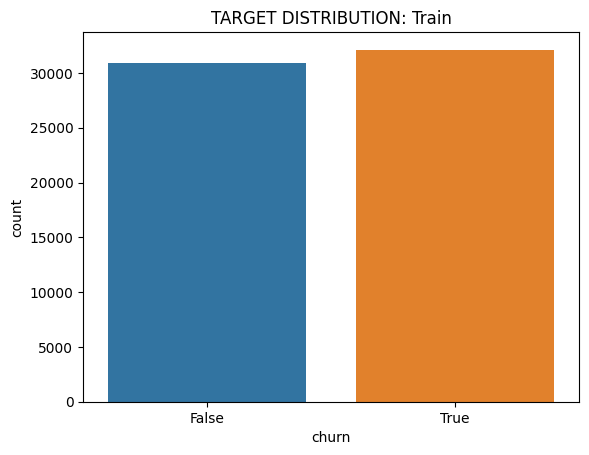

In [13]:
sns.countplot(x=y_train)
plt.title('TARGET DISTRIBUTION: Train')
plt.show()

# Rescaling

* NO NECESARIO en modelos de Arboles de Decisión.
* Guardar scaler en el model path.

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [15]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_train_std = pd.DataFrame(data = X_train_std, columns=X_train.columns, index=X_train.index)    #la funcion scaler nos devuelve un numpy.matrix, le devolvemos el formato de dataframe

In [16]:
import pickle
# Save the transformer object
pickle.dump(scaler, open('/content/drive/MyDrive/NDS_2023/EJERCICIO-ML-Sup/model/scaler.pkl', 'wb'))

In [17]:
X_train_std.head()

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,months,uniqsubs,actvsubs,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,refurb_new,hnd_price,phones,models,truck,rv,ownrent,lor,dwlltype,adults,income,numbcars,dwllsize,forgntvl,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,new_cell_N,new_cell_U,new_cell_Y,crclscod_A,crclscod_AA,crclscod_BA,crclscod_CA,crclscod_EA,crclscod_infrequent_sklearn,prizm_social_one_C,prizm_social_one_S,prizm_social_one_T,prizm_social_one_U,prizm_social_one_Unknown,prizm_social_one_infrequent_sklearn,dualband_N,dualband_T,dualband_Y,dualband_infrequent_sklearn,hnd_webcap_Unknown,hnd_webcap_WC,hnd_webcap_WCMB,hnd_webcap_infrequent_sklearn,marital_A,marital_B,marital_M,marital_S,marital_U,marital_infrequent_sklearn,infobase_Unknown,HHstatin_A,HHstatin_B,HHstatin_C,HHstatin_I,HHstatin_Unknown,HHstatin_infrequent_sklearn,ethnic_G,ethnic_H,ethnic_N,ethnic_S,ethnic_U,ethnic_infrequent_sklearn,area_group_Mid-Atlantic,area_group_Midwest,area_group_Northeast,area_group_South,area_group_West,area_group_infrequent_sklearn
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1020871,0.038451,0.038453,0.038450,0.03845,0.038452,0.038450,0.038450,0.03845,0.03845,0.081425,0.081430,0.373203,-0.060945,-0.001127,-0.026924,0.641605,-0.062409,1.292689,-0.101805,0.432181,-0.020498,1.492701,-0.099341,-0.339927,-0.358022,-0.341068,0.374025,0.065104,0.431014,-0.085438,0.446231,1.169189,0.323209,-0.189919,-0.254680,1.999645,-0.092585,1.299841,-0.088565,-0.073661,-0.091269,-0.374352,-0.073241,0.207999,1.279720,1.475213,-0.023575,-0.268472,0.298288,-0.473654,-0.546763,-0.367719,0.475965,0.248820,0.881130,0.750843,0.261244,0.488925,0.578423,0.017401,0.352385,0.567355,0.978649,1.114511,0.127581,0.127581,0.127580,0.003984,0.089353,0.003984,0.003984,0.124854,0.124854,0.697356,0.645166,0.670778,0.535627,0.572365,0.211312,0.774702,0.124854,0.124854,0.124854,0.124854,0.124854,0.124854,0.124854,0.003932,-0.412683,0.730756,-0.504039,-0.45717,1.277763,-0.378156,-0.299565,-0.255054,-0.46653,-0.453460,1.444340,-0.424937,-0.549229,-0.279435,-0.225245,-0.542665,-0.199223,0.604467,-0.044048,-0.344107,-0.409676,0.579843,-0.045121,-0.234696,-0.27572,1.470218,-0.463475,-0.764166,-0.124854,-0.525063,-0.221288,-0.183489,-0.815714,2.609149,-0.760678,-0.165268,-0.253001,-0.390614,-0.716751,-0.384546,-0.355227,1.844257,-0.316098,-0.520214,-0.453562,-0.765339,2.328242,-0.020706
1034456,0.038449,0.038438,0.038449,0.03845,0.038449,0.038449,0.038449,0.03845,0.03845,0.081431,0.081431,-0.474153,-0.060945,-0.371885,-0.026924,-0.711367,-0.062409,-0.799779,-0.101805,-0.513217,-0.020498,-0.781762,-0.099341,-0.339927,-0.358022,-0.341068,-0.392465,-0.271557,-0.794300,-0.085438,-0.625661,-0.680743,-0.550505,-0.483670,-0.439032,-0.699368,-0.092585,-0.750744,-0.088565,-0.615647,-0.091269,-0.654324,-0.073241,-0.538031,-0.799981,-0.781796,-0.023575,-0.332309,0.516677,-0.473654,-0.546763,-0.367719,-0.563767,-0.737331,-0.208616,-0.172636,-0.734518,-0.561211,-0.573204,-0.974528,-0.829137,-0.876500,-0.755168,-0.489161,0.127576,0.127578,0.127579,0.003984,0.089352,0.003984,0.003984,0.124854,0.124854,0.697356,0.645166,0.670778,0.535627,0.572365,0.211312,0.774702,0.124854,0.124854,0.124854,0.124854,0.124854,0.124854,0.124854,0.004063,-0.412683,0.730756,-0.504039,-0.45717,1.277763,-0.378156,-0.299565,-0.255054,-0.46653,-0.453460,1.444340,-0.424937,-0.549229,-0.279435,-0.225245,-0.542665,-0.199223,0.604467,-0.044048,-0.344107,-0.409676,0.579843,-0.

# TRAIN-VALIDA

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

## Torneo de Modelos

* Probamos una colección de modelos con el objetivo de conseguir el mejor rendimiento del modelo en los datos de VALIDACION.

In [19]:
# Calculo del AUC de un modelo sobre un dataset (X-y). Args: modelo a validar, X, y
def auc(model,X,y):
  model.fit(X,y)
  return roc_auc_score(y,model.predict_proba(X)[:,1])  

# Calculo del AUC de un modelo sobre un dataset con Cross-Validation (X-y). Args: modelo a validar, X, y  
def auc_cross_validation(model,X,y):
  cross_val = cross_val_score(model, 
                              X, y, 
                              cv = 5,                 # Numero de folds que vamos a utilizar para validar 
                              scoring = 'roc_auc'     # La metrica de validacion que se medira en cada train-valida
                              )    
  return cross_val.mean()

In [20]:
# Inicializa resultados
label_, auc_train_ , auc_valida_ = [], [], []

# Completa un registro en dataframe con los resultados de las funciones definidas previsamente ( AUC y AUC con cross-validation)

# Inputs: 
#   * modelo
#   * (X,y) 
#   * label especifico si queremos registrar el resultado con otro nombre (opcional)


def evaluate_classification(model, X, y, label=None):
  if label is None:
    label=str(model)
  label_.append(label)
  
  auc_train = auc(model,X,y)
  auc_valida = auc_cross_validation(model,X,y)   
  auc_train_.append(auc_train)
  auc_valida_.append(auc_valida)

  return pd.DataFrame({'Model': label_,
                      'AUC Train': auc_train_,
                      'AUC Cross-Valida': auc_valida_
                      }).sort_values('AUC Cross-Valida',ascending=False)

In [ ]:
from sklearn.linear_model import LogisticRegression
evaluate_classification(model = LogisticRegression(), 
                        X = X_train_std, 
                        y = y_train)

,Model,AUC Train,AUC Cross-Valida
0,LogisticRegression(),0.604609,0.600223


In [ ]:
# El HistBoostingClassifier overfitea mucho a pesar de tener mejores resultados:
from sklearn.ensemble import HistGradientBoostingClassifier
evaluate_classification(model = HistGradientBoostingClassifier(),
                        X = X_train,
                        y = y_train)

,Model,AUC Train,AUC Cross-Valida
1,HistGradientBoostingClassifier(),0.755209,0.677367
0,LogisticRegression(),0.604609,0.600223


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
evaluate_classification(model = GradientBoostingClassifier(),
                        X = X_train,
                        y = y_train)

,Model,AUC Train,AUC Cross-Valida
1,HistGradientBoostingClassifier(),0.755209,0.677367
2,GradientBoostingClassifier(),0.690705,0.670628
0,LogisticRegression(),0.604609,0.600223


In [ ]:
from xgboost import XGBClassifier
evaluate_classification(model = XGBClassifier(), 
                        X = X_train,
                        y = y_train)

,Model,AUC Train,AUC Cross-Valida
1,HistGradientBoostingClassifier(),0.755209,0.677367
2,GradientBoostingClassifier(),0.690705,0.670628
3,"XGBClassifier(base_score=None, booster=None, c...",0.862829,0.662539
0,LogisticRegression(),0.604609,0.600223


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
evaluate_classification(model = AdaBoostClassifier(),
                        X = X_train,
                        y = y_train)

,Model,AUC Train,AUC Cross-Valida
1,HistGradientBoostingClassifier(),0.755209,0.677367
2,GradientBoostingClassifier(),0.690705,0.670628
3,"XGBClassifier(base_score=None, booster=None, c...",0.862829,0.662539
4,AdaBoostClassifier(),0.663714,0.655777
0,LogisticRegression(),0.604609,0.600223


In [ ]:
from sklearn.ensemble import RandomForestClassifier
evaluate_classification(model = RandomForestClassifier(),
                        X = X_train,
                        y = y_train)

,Model,AUC Train,AUC Cross-Valida
1,HistGradientBoostingClassifier(),0.755209,0.677367
2,GradientBoostingClassifier(),0.690705,0.670628
3,"XGBClassifier(base_score=None, booster=None, c...",0.862829,0.662539
4,AdaBoostClassifier(),0.663714,0.655777
5,RandomForestClassifier(),1.000000,0.653468
0,LogisticRegression(),0.604609,0.600223


In [ ]:
pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import lightgbm as lgb
evaluate_classification(model = lgb.LGBMClassifier(),
                        X = X_train,
                        y = y_train)

,Model,AUC Train,AUC Cross-Valida
6,LGBMClassifier(),0.758521,0.678418
1,HistGradientBoostingClassifier(),0.755209,0.677367
2,GradientBoostingClassifier(),0.690705,0.670628
3,"XGBClassifier(base_score=None, booster=None, c...",0.862829,0.662539
4,AdaBoostClassifier(),0.663714,0.655777
5,RandomForestClassifier(),1.000000,0.653468
0,LogisticRegression(),0.604609,0.600223


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
evaluate_classification(model = KNeighborsClassifier(),
                        X = X_train,
                        y = y_train)

,Model,AUC Train,AUC Cross-Valida
6,LGBMClassifier(),0.758521,0.678418
1,HistGradientBoostingClassifier(),0.755209,0.677367
2,GradientBoostingClassifier(),0.690705,0.670628
3,"XGBClassifier(base_score=None, booster=None, c...",0.862829,0.662539
4,AdaBoostClassifier(),0.663714,0.655777
5,RandomForestClassifier(),1.000000,0.653468
0,LogisticRegression(),0.604609,0.600223
7,KNeighborsClassifier(),0.769156,0.545491


En un principio nos quedamos con el **GradientBoosting Classifier** ya que da un resultado de AUC Cross-Valida muy similar a los de LGBMClassifier 
e HistGradientBoosting Classifier y no overfitea tanto los resultados (no hay tanta diferencia entre el AUC Train y el AUC Cross-Valida); nos puede ofrecer un buen equilibrio entre rendimiento y generalización.

## Hiperparametrizacion

* Utilizar RandomSearch para probar diferentes configuraciones de los parametros del modelo ganador en el torneo de modelos con el objetivo de mejorar el control del overfitting.

In [21]:
from sklearn.model_selection import RandomizedSearchCV

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
?GradientBoostingClassifier

In [ ]:
# Definir la parameter grid
parameters_hp = { 
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200],
    'min_samples_leaf': [1, 5, 10],
}

In [ ]:
search_hp = RandomizedSearchCV(estimator = GradientBoostingClassifier(), 
                               param_distributions = parameters_hp,
                               scoring = 'roc_auc', # metrica a optimizar: AUC
                               cv = 4, # numero de folds para cross-validation
                               n_iter = 10, # numero de iteraciones, cada una testeara una configuracion distinta. 
                               n_jobs=-1, 
                               verbose=True)

In [ ]:
search_hp.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'min_samples_leaf': [1, 5, 10],
                                        'n_estimators': [100, 200]},
                   scoring='roc_auc', verbose=True)

In [ ]:
print("---- Results from Random Search -----")
print("\n The best estimator across ALL searched params:", search_hp.best_estimator_)
print("\n The best AUC:", search_hp.best_score_)
print("\n The best parameters across ALL searched params:\n", search_hp.best_params_)

---- Results from Random Search -----

 The best estimator across ALL searched params: GradientBoostingClassifier(max_depth=5, min_samples_leaf=5, n_estimators=200)

 The best AUC: 0.6781777495128318

 The best parameters across ALL searched params:
 {'n_estimators': 200, 'min_samples_leaf': 5, 'max_depth': 5, 'learning_rate': 0.1}


In [ ]:
evaluate_classification(model=GradientBoostingClassifier(n_estimators=200, min_samples_leaf=5, max_depth=5, learning_rate=0.1),
                        X=X_train,
                        y=y_train)

,Model,AUC Train,AUC Cross-Valida
8,"GradientBoostingClassifier(max_depth=5, min_sa...",0.790620,0.678504
6,LGBMClassifier(),0.758521,0.678418
1,HistGradientBoostingClassifier(),0.755209,0.677367
2,GradientBoostingClassifier(),0.690705,0.670628
3,"XGBClassifier(base_score=None, booster=None, c...",0.862829,0.662539
4,AdaBoostClassifier(),0.663714,0.655777
5,RandomForestClassifier(),1.000000,0.653468
0,LogisticRegression(),0.604609,0.600223
7,KNeighborsClassifier(),0.769156,0.545491


Observamos como el modelo hiperparametrizado también ovefitea en el AUC Train, y no mejora tanto el AUC Cross-Valida así que vamos a probar de hiperparametrizar el **LGMClassifier** y el **HistGradientBoosting**, por si nos mejoran los resultados.

In [22]:
import lightgbm as lgb
?lgb.LGBMClassifier

In [23]:
parameters_lgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'num_leaves': [31, 63, 127],
    'min_data_in_leaf': [1, 5, 10],
}

In [25]:
search_lgb = RandomizedSearchCV(estimator = lgb.LGBMClassifier(), 
                               param_distributions = parameters_lgb,
                               scoring = 'roc_auc', # metrica a optimizar: AUC
                               cv = 4, # numero de folds para cross-validation
                               n_iter = 10, # numero de iteraciones, cada una testeara una configuracion distinta. 
                               n_jobs=-1, 
                               verbose=True)

In [26]:
search_lgb.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1


RandomizedSearchCV(cv=4, estimator=LGBMClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'min_data_in_leaf': [1, 5, 10],
                                        'n_estimators': [100, 200],
                                        'num_leaves': [31, 63, 127]},
                   scoring='roc_auc', verbose=True)

In [27]:
print("---- Results from Random Search -----")
print("\n The best estimator across ALL searched params:", search_lgb.best_estimator_)
print("\n The best AUC:", search_lgb.best_score_)
print("\n The best parameters across ALL searched params:\n", search_lgb.best_params_)

---- Results from Random Search -----

 The best estimator across ALL searched params: LGBMClassifier(max_depth=5, min_data_in_leaf=1)

 The best AUC: 0.6768368880141793

 The best parameters across ALL searched params:
 {'num_leaves': 31, 'n_estimators': 100, 'min_data_in_leaf': 1, 'max_depth': 5, 'learning_rate': 0.1}


In [28]:
evaluate_classification(lgb.LGBMClassifier(num_leaves= 31, n_estimators= 100, min_data_in_leaf= 1, max_depth= 5, learning_rate= 0.1),
                        X=X_train,
                        y=y_train)

[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1


,Model,AUC Train,AUC Cross-Valida
0,"LGBMClassifier(max_depth=5, min_data_in_leaf=1)",0.744907,0.677203


In [29]:
from sklearn.ensemble import HistGradientBoostingClassifier
?HistGradientBoostingClassifier

In [30]:
parameters_hgb = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'max_leaf_nodes': [31, 63, 127],
    'min_samples_leaf': [1, 5, 10],
    'max_iter': [100, 200],
}

In [31]:
search_hgb = RandomizedSearchCV(estimator = HistGradientBoostingClassifier(), 
                               param_distributions = parameters_hgb,
                               scoring = 'roc_auc', # metrica a optimizar: AUC
                               cv = 4, # numero de folds para cross-validation
                               n_iter = 10, # numero de iteraciones, cada una testeara una configuracion distinta. 
                               n_jobs=-1, 
                               verbose=True)

In [32]:
search_hgb.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=HistGradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'max_iter': [100, 200],
                                        'max_leaf_nodes': [31, 63, 127],
                                        'min_samples_leaf': [1, 5, 10]},
                   scoring='roc_auc', verbose=True)

In [33]:
print("---- Results from Random Search -----")
print("\n The best estimator across ALL searched params:", search_hgb.best_estimator_)
print("\n The best AUC:", search_hgb.best_score_)
print("\n The best parameters across ALL searched params:\n", search_hgb.best_params_)

---- Results from Random Search -----

 The best estimator across ALL searched params: HistGradientBoostingClassifier(max_depth=7, min_samples_leaf=10)

 The best AUC: 0.6750735856822321

 The best parameters across ALL searched params:
 {'min_samples_leaf': 10, 'max_leaf_nodes': 31, 'max_iter': 100, 'max_depth': 7, 'learning_rate': 0.1}


In [34]:
evaluate_classification(HistGradientBoostingClassifier(min_samples_leaf = 10, max_leaf_nodes= 31, max_iter= 100, max_depth= 7, learning_rate= 0.1),
                        X=X_train,
                        y=y_train)

,Model,AUC Train,AUC Cross-Valida
1,"HistGradientBoostingClassifier(max_depth=7, mi...",0.752304,0.677298
0,"LGBMClassifier(max_depth=5, min_data_in_leaf=1)",0.744907,0.677203


In [74]:
# GradientBoostingClassifier(max_depth=5, min_sa...	  AUC Train = 0.790620    AUC Cross-Valida =	0.678504
# GradientBoostingClassifier()	                      AUC Train = 0.690705	  AUC Cross-Valida =	0.670628

Como en el torneo de modelos hiperparametrizados el resultado del AUC Cross-Valida es similar en todos y en todos los casos se overfitea, vamos a quedarnos finalmente con el **GradientBoostClassifier sin hiperparametrizar**, ya que nos ofrece el mejor compromiso entre el AUC Cross-Valida y menor overfiting del modelo.

## Modelo final

* Entrenar el modelo final con el algoritmo y los parametros que han funcionado mejor en anteriores experimentos.
* Argumentar la elección.
* Guardar el modelo en model path.

In [75]:
best_model = GradientBoostingClassifier()
print(best_model)

GradientBoostingClassifier()


In [77]:
best_model.fit(X_train, y_train)

GradientBoostingClassifier()

# TEST

* Evaluación de las métricas de performance en TEST.

In [78]:
y_train_pred = best_model.predict(X_train)  # predicciones del modelo en los datos de TRAIN
y_test_pred = best_model.predict(X_test)    # predicciones del modelo en los datos de TEST

In [79]:
y_train_pred_proba = best_model.predict_proba(X_train)[:, 1]   # probabilidad de éxito (1) segun el modelo en los datos de TRAIN
y_test_pred_proba = best_model.predict_proba(X_test)[:, 1]     # probabilidad de éxito (1) segun el modelo en los datos de TEST

* AUC

In [80]:
auc_train = roc_auc_score(y_train, y_train_pred_proba)    # AUC en TRAIN
auc_test = roc_auc_score(y_test, y_test_pred_proba)       # AUC en TEST

In [81]:
print('AUC Train:', round(auc_train,4))
print('AUC Test:', round(auc_test,4))

AUC Train: 0.6907
AUC Test: 0.6746


* ROC Curve

In [82]:
from sklearn.metrics import roc_curve

In [83]:
# metrics for ROC
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)

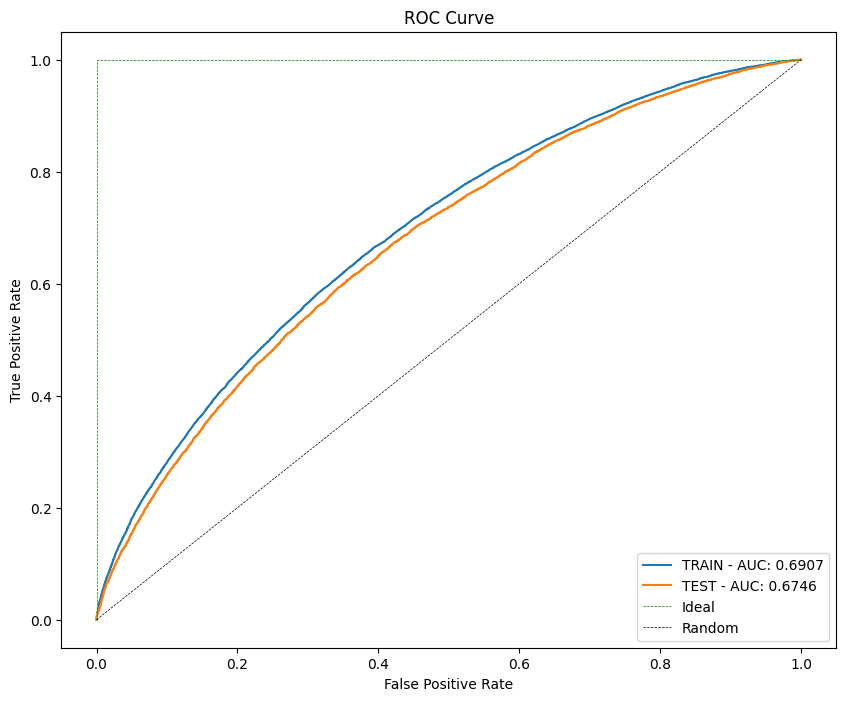

In [84]:
#Plot
plt.figure(figsize=[10,8])
plt.plot(fpr_train, tpr_train, label='TRAIN - AUC: {:.4f}'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='TEST - AUC: {:.4f}'.format(auc_test))
plt.title('ROC Curve')
plt.plot([0,0,1],[0,1,1], color='green', linestyle='--', linewidth=0.5, label='Ideal')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', linewidth=0.5, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

* Confusion Matrix

In [85]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [86]:
cm_test = confusion_matrix(y_test, y_test_pred)

[]

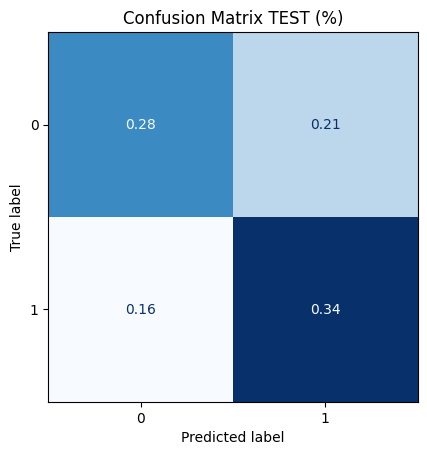

In [87]:
ConfusionMatrixDisplay(confusion_matrix=cm_test/len(y_test)).plot(colorbar = False, cmap = 'Blues')
plt.title('Confusion Matrix TEST (%)')
plt.plot()

* Accuracy, Precision, Recall y F1-Score

In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy:', round( accuracy_score(y_test, y_test_pred),4))
print('Precision:', round( precision_score(y_test, y_test_pred), 4))
print('Recall:', round( recall_score(y_test, y_test_pred), 4))
print('F1-score:', round(f1_score(y_test, y_test_pred), 4))

Accuracy: 0.6252
Precision: 0.6181
Recall: 0.6804
F1-score: 0.6478


In [89]:
import pickle
pickle.dump(best_model, open('/content/drive/MyDrive/NDS_2023/EJERCICIO-ML-Sup/model/classifier.pkl', 'wb'))

# INTERPRETABILITY

* Analizamos top features del modelo y su peso en el modelo.
* Plotear SHAP values y el impacto positivo/negativo.

In [69]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [90]:
import shap

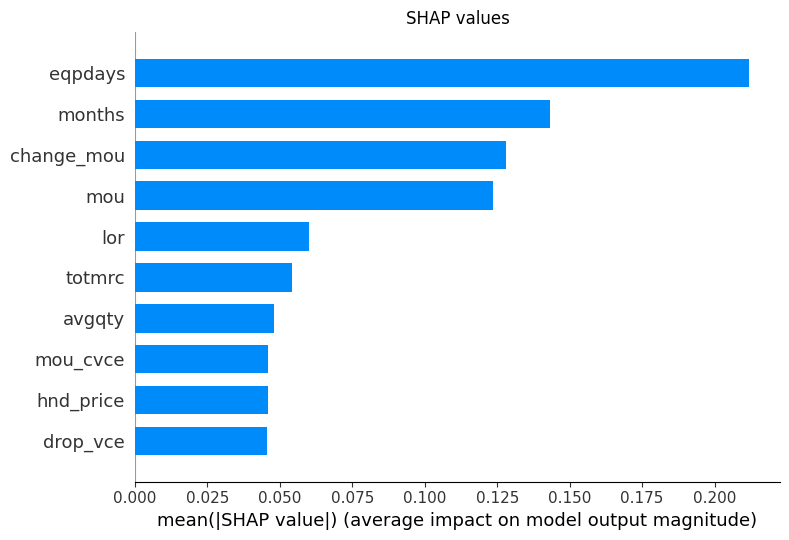

In [93]:
#SHAP value: peso en el output final
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)
plt.title('SHAP values')
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=10)

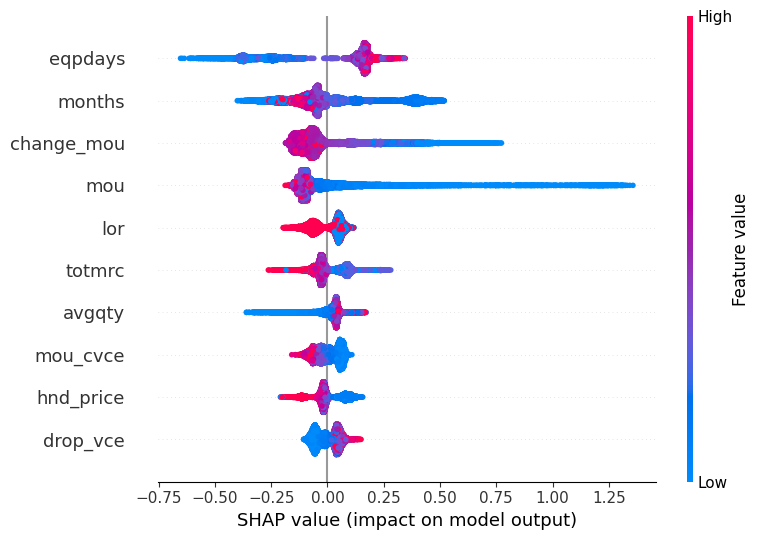

In [94]:
shap.summary_plot(shap_values, X_test, max_display=10)

Interpretando los resultados en base a la información dada sobre las variables (top10) y su relación con el churn:

Variables directamente relacionadas con el churn:
1. **eqpdays**: A medida que aumenta el número de días de antigüedad del equipo actual, es más probable que ocurra el churn. Esto puede sugerir que los clientes que han tenido su equipo durante mucho tiempo pueden estar menos satisfechos con el servicio y más propensos a buscar otras opciones.
7. **avgqty**: A medida que aumenta el promedio mensual de la cantidad de llamadas realizadas a lo largo de la vida del cliente, es más probable que ocurra el churn. Esto podría indicar que los clientes que hacen más llamadas tienen una mayor volatilidad y pueden ser más propensos a buscar alternativas.
10. **drop_vce**: A medida que aumenta el promedio de llamadas de voz caídas, es más probable que ocurra el churn. Esto sugiere que los clientes que experimentan una alta tasa de llamadas de voz caídas pueden estar insatisfechos con la calidad del servicio y ser más propensos a abandonarlo.

Variables inversamente relacionadas con el churn:
2. **months**: A medida que aumenta el número total de meses en servicio, es menos probable que ocurra el churn. Esto sugiere que la lealtad y la satisfacción de los clientes aumentan a medida que se mantienen en el servicio durante más tiempo.
3. **change_mou**: A medida que disminuye el cambio porcentual en los minutos mensuales de uso en comparación con el promedio de los tres meses anteriores, es menos probable que ocurra el churn. Esto indica que los clientes cuyo uso de minutos se mantiene estable o disminuye gradualmente tienen menos probabilidades de abandonar el servicio.
4. **mou**: A medida que aumenta el promedio de minutos mensuales de uso, es menos probable que ocurra el churn. Esto puede indicar que los clientes que utilizan más minutos están más comprometidos con el servicio y tienen menos probabilidades de abandonarlo.
5. **lor**: A medida que aumenta la longitud de residencia, es menos probable que ocurra el churn. Esto sugiere que los clientes que han estado viviendo en el mismo lugar durante más tiempo tienen una mayor estabilidad y compromiso con el servicio.
6. **totmrc**: A medida que aumenta el promedio mensual de cargos recurrentes totales, es menos probable que ocurra el churn. Esto puede indicar que los clientes que gastan más en el servicio tienen una mayor inversión y compromiso, lo que reduce su propensión a abandonarlo.
8. **mou_cvce**: A medida que aumenta el promedio de minutos de uso de llamadas de voz completadas, es menos probable que ocurra el churn. Esto puede sugerir que los clientes que realizan más llamadas de voz tienen una mayor interacción con el servicio y están menos inclinados a abandonarlo.
9. **hnd_price**: A medida que aumenta el precio actual del equipo, es menos probable que ocurra el churn. Esto podría indicar que los clientes que invierten más en su equipo tienen una mayor inversión general en el servicio y son menos propensos a abandonarlo.


En base en estos resultados, podríamos dar las siguientes recomendaciones al equipo de marketing:

1. **Enfoque en retener a los clientes más antiguos**: Dado que el número de meses en servicio (**months**) y la longitud de residencia (**lor**) están inversamente relacionados con el churn, es importante desarrollar estrategias para fomentar la lealtad y la permanencia de los clientes a largo plazo. Esto podría incluir programas de fidelización, incentivos especiales para clientes antiguos y mejorar la calidad del servicio a medida que pasa el tiempo.
2. **Monitorear y abordar cambios negativos en el uso de minutos**: La disminución en el cambio absoluto y el cambio porcentual en el uso de minutos mensuales (**mou, change_mou**) indica una mayor probabilidad de churn. El equipo de marketing debe estar atento a los cambios negativos en el uso de minutos de los clientes y tomar medidas proactivas para abordar cualquier problema que puedan estar enfrentando, como mejorar la calidad de la red o ofrecer planes de minutos más adecuados a sus necesidades.
3. **Mejorar la calidad del servicio y la experiencia del cliente**: La antigüedad del equipo (**eqpdays**) y las llamadas de voz caídas (**drop_vce**) están directamente relacionadas con el churn. Para reducir la probabilidad de churn, el equipo de marketing debe trabajar en mejorar la calidad del servicio, asegurando una conexión estable y confiable, así como abordando cualquier problema relacionado con las llamadas de voz caídas. Esto puede incluir inversiones en infraestructura, mejoras en la red y capacitación del personal de atención al cliente.
4. **Considerar la relación entre el equipo y el churn**: La antigüedad del equipo actual (**eqpdays**) muestra una relación directa con el churn; y la variable **hnd_price** indica que un precio más alto del equipo está inversamente relacionado con el churn. El equipo de marketing podría incluir promociones especiales de actualización de equipos de buena calidad, incentivos para explorar nuevas funciones y beneficios.

* Analisis complementarios:
  * Modelos de arboles: Feature Importances, plot de arbol de decision.
  * Modelos lineales: Coeficentes y formula del modelo.

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [96]:
# Crear un objeto de modelo de árbol de decisión
model = DecisionTreeClassifier()

# Entrenar el modelo utilizando los datos de entrenamiento
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [97]:
# Obtener las importancias de características
importances = model.feature_importances_

# Crear un dataframe para mostrar las importancias de características
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances.sort_values('Importance', ascending=False, inplace=True)
feature_importances.head(10)


,Feature,Importance
87,eqpdays,0.051563
9,change_mou,0.040046
10,change_rev,0.028567
48,months,0.027097
1,mou,0.026375
58,avgrev,0.022058
0,rev,0.020656
32,mouowylisv,0.020287
15,unan_vce,0.020224
30,mou_rvce,0.019449
